In [2194]:
import cv2
import matplotlib.pyplot as plt 
from scipy import ndimage as nd
import numpy as np
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.morphology import disk

In [2195]:
def concat(img,markers):
    plt.imshow(img,cmap='gray',alpha=0.5)
    plt.imshow(markers,cmap='gray')

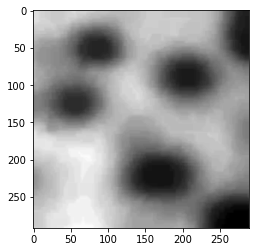

In [2196]:
image = cv2.imread('A.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel, iterations = 4)
plt.imshow(closing, cmap='gray')

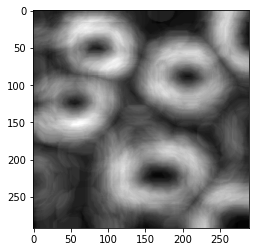

In [2197]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30, 30))
gradient = cv2.morphologyEx(closing, cv2.MORPH_GRADIENT, kernel)
_, threshold = cv2.threshold(gradient, 29, 255, cv2.THRESH_BINARY )
plt.imshow(gradient, cmap='gray')

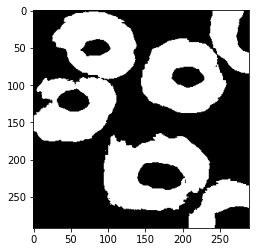

In [2198]:

plt.imshow(threshold, cmap='gray')

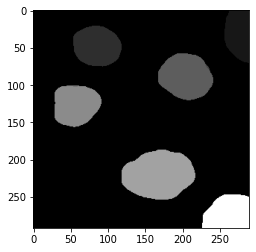

In [2199]:
labels = watershed(threshold)
labels = np.uint8(labels)
labels = cv2.erode(labels,kernel)
labels = cv2.dilate(labels,kernel)
plt.imshow(labels, cmap='gray')

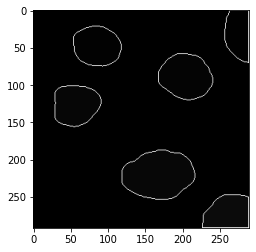

In [2200]:
img = labels
_, labels = cv2.threshold(labels, 1, 255, cv2.THRESH_BINARY )
contours, hierarchy = cv2.findContours( labels, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (255,0,0), 1)
plt.imshow(img,cmap='gray')

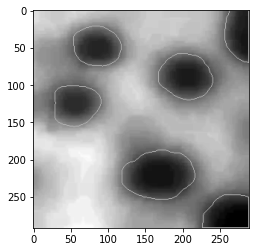

In [2201]:
_, img = cv2.threshold(img, 14, 255, cv2.THRESH_BINARY )
closing[img==255] = 155
plt.imshow(closing,cmap='gray')

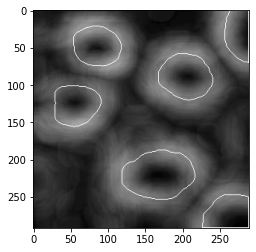

In [2202]:
gradient[img==255] = 100
plt.imshow(gradient,cmap='gray')